# Разведовательный анализ данных EDA
## Основные цели и задачи проекта
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
## Краткая информация о данных в датасете
1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

## Этапы работы над проектом

1. Проведение первичной обработки данных. 
2. Устранение выбросов.
3. Оценка количества уникальных значений для номинативных переменных.
4. Проведение корреляционного анализа количественных переменных
5. Анализ номинативных переменных.
6. Формирование выводов о даннных используемых в будущей модели.

## До этапная подготовка
### Загрузка датасета и необходимых для работы библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math_power = pd.read_csv('stud_math.xls')

### Предобработка данных

In [113]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math_power.loc[math_power.loc[:, column].isin(math_power.loc[:, column].value_counts().index[:5])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = math_power.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_power.loc[math_power.loc[:, column] == comb[0], 'score'], 
                        math_power.loc[math_power.loc[:, column] == comb[1], 'score']).pvalue\
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Этап №1
## Проведение первичной обработки данных датасета

In [3]:
math_power

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [4]:
math_power.info()
math_power.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Из представленного датасета можно следующие выводы:
- В таблице собрана информация на 395 человек
- Из заявленных 29 столбцов мы имеем 30 (столбец "studytime, granular" не имеет пояснения и логически не поддается анализу)
- В датасете представленны 17 строковых и 13 числовых столбцов
### Обработка датасета от не нужного столбца

In [5]:
del math_power['studytime, granular']
math_power

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Проведение первичной обработки датасета каждого столбца строковой величины
### Абревиатура школы

In [6]:
print(math_power.school.nunique())
pd.DataFrame(math_power.school.value_counts())

2


,school
GP,349
MS,46


Идеальный столбец ни добавить, ни убрать. В нашем анализе участвуют ученики двух школ.

### Пол ученика

In [7]:
print(math_power.sex.nunique())
pd.DataFrame(math_power.sex.value_counts())

2


,sex
F,208
M,187


Идеальный столбец ни добавить, ни убрать №2. Число полов в нашем датасете не превышает 2, что входит в стандартную гетеросексуальную направленность.
### Тип адреса ученика

In [8]:
print(math_power.address.nunique(),math_power.address.isna().sum())
pd.DataFrame(math_power.address.value_counts())

2 17


,address
U,295
R,83


In [9]:
math_power.address = math_power.address.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, значительно большее количества учеников живут в городе, а также в столбце есть 17 значений в которых данные не известны.
### Размер семьи

In [10]:
print(math_power.famsize.nunique(),math_power.famsize.isna().sum())
pd.DataFrame(math_power.famsize.value_counts())

2 27


,famsize
GT3,261
LE3,107


In [11]:
math_power.famsize = math_power.famsize.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, большинство семей, в которых живут ученики, имеют больше 3 членов семьи. 27 значений неизвестно.
### Статус совместного жилья родителей

In [12]:
print(math_power.Pstatus.nunique(),math_power.Pstatus.isna().sum())
pd.DataFrame(math_power.Pstatus.value_counts())

2 45


,Pstatus
T,314
A,36


In [13]:
math_power.Pstatus = math_power.Pstatus.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, совместное проживание родителей имеет большее число значений. 45 значений неизвестно.
### Работа матери

In [14]:
print(math_power.Mjob.nunique(),math_power.Mjob.isna().sum())
pd.DataFrame(math_power.Mjob.value_counts())

5 19


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [15]:
math_power.Mjob = math_power.Mjob.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, у матерей учеников преобладает разнонаправленная работа. 19 значений неизвестно.
### Работа отца

In [16]:
print(math_power.Fjob.nunique(),math_power.Fjob.isna().sum())
pd.DataFrame(math_power.Fjob.value_counts())

5 36


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [17]:
math_power.Fjob = math_power.Fjob.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, у отцов учеников преобладает разнонаправленная работа. 36 значений неизвестно.
### Причина выбора школы

In [18]:
print(math_power.reason.nunique(),math_power.reason.isna().sum())
pd.DataFrame(math_power.reason.value_counts())

4 17


,reason
course,137
home,104
reputation,103
other,34


In [19]:
math_power.reason = math_power.reason.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, с небольшим перевесом преобладает мнение об образовательной программе в школе.
### Опекун

In [20]:
print(math_power.guardian.nunique(),math_power.guardian.isna().sum())
pd.DataFrame(math_power.guardian.value_counts())

3 31


,guardian
mother,250
father,86
other,28


In [21]:
math_power.guardian = math_power.guardian.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца о совместном проживании родителей, данный столбец несет информацию об официальной ответственности. Отсуствует 31 значение.
### Доп. образовательная поддержка

In [22]:
print(math_power.schoolsup.nunique(),math_power.schoolsup.isna().sum())
pd.DataFrame(math_power.schoolsup.value_counts())

2 9


,schoolsup
no,335
yes,51


In [23]:
math_power.schoolsup = math_power.schoolsup.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца всего лишь малая часть занимается образованием вне школы, отсуствует 9 значений.
### Семейная образовательная поддержка

In [24]:
print(math_power.famsup.nunique(),math_power.famsup.isna().sum())
pd.DataFrame(math_power.famsup.value_counts())

2 39


,famsup
yes,219
no,137


In [25]:
math_power.famsup = math_power.famsup.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, больше половины семей оказывают внимание к образованию своих детей. 39 значений отсуствует.
### Доп. занятия по математике

In [26]:
print(math_power.paid.nunique(),math_power.paid.isna().sum())
pd.DataFrame(math_power.paid.value_counts())

2 40


,paid
no,200
yes,155


In [27]:
math_power.paid = math_power.paid.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, большая часть детей не получает доп. образования по математике. Отсуствует 40 значений.
### Внеучебные занятия

In [28]:
print(math_power.activities.nunique(),math_power.activities.isna().sum())
pd.DataFrame(math_power.activities.value_counts())

2 14


,activities
yes,195
no,186


In [29]:
math_power.activities = math_power.activities.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, примерно половина детей проявляют интерес к внеучебным занятиям. Отсуствует 14 значений.
### Посещение детского сада

In [30]:
print(math_power.nursery.nunique(),math_power.nursery.isna().sum())
pd.DataFrame(math_power.nursery.value_counts())

2 16


,nursery
yes,300
no,79


In [31]:
math_power.nursery = math_power.nursery.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, значительная большая часть детей посещали детский сад. Отсуствует 16 значений.
### Желание высшего образования

In [32]:
print(math_power.higher.nunique(),math_power.higher.isna().sum())
pd.DataFrame(math_power.higher.value_counts())

2 20


,higher
yes,356
no,19


In [33]:
math_power.higher = math_power.higher.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, почти все дети имеют стремление получить высшее образование. Отсуствует 20 значений.
### Наличие интернета дома

In [34]:
print(math_power.internet.nunique(),math_power.internet.isna().sum())
pd.DataFrame(math_power.internet.value_counts())

2 34


,internet
yes,305
no,56


In [35]:
math_power.internet = math_power.internet.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, у значительно большей части детей имеется дома интернет. Отсуствует 34 значения.
### В романтических отнешениях

In [36]:
print(math_power.romantic.nunique(),math_power.romantic.isna().sum())
pd.DataFrame(math_power.romantic.value_counts())

2 31


,romantic
no,240
yes,124


In [37]:
math_power.romantic = math_power.romantic.apply(lambda x: None if pd.isnull(x) else x)

По данным таблицы примерно треть детей, находятся в романтических отношениях. Отсуствует 31 значение.

## Проведение первичной обработки датасета каждого столбца числовой величины
### Возраст ученика

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

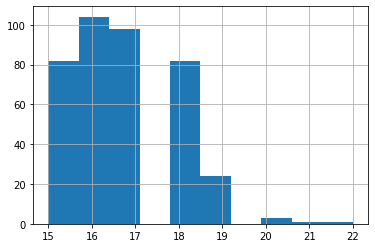

In [38]:
math_power.age.hist()
math_power.age.describe()

По данным столбца, возраст учеников имеет нормальное распределение. Отсуствующих значенией нет.
### Образование матери

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

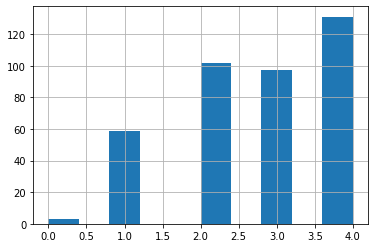

In [39]:
math_power.Medu.hist()
math_power.Medu.describe()

In [40]:
math_power.Medu = math_power.Medu.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, преобладают матери с высшим образованием, выбросы отсуствуют. Отсуствует 3 значения.
### Образование отца

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

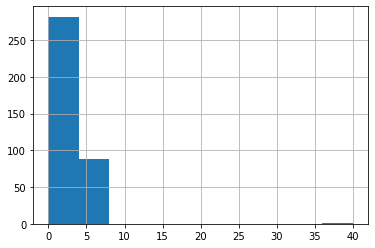

In [41]:
math_power.Fedu.hist()
math_power.Fedu.describe()

In [42]:
print(math_power.Fedu.nunique(),math_power.Fedu.isna().sum())
pd.DataFrame(math_power.Fedu.value_counts())

6 24


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [43]:
math_power.Fedu = math_power.Fedu.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, в значениях есть не допустимые данные (выброс), большинство отцов с высшим образованием. Отсуствует 24 значения.
### Время в пути до школы

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

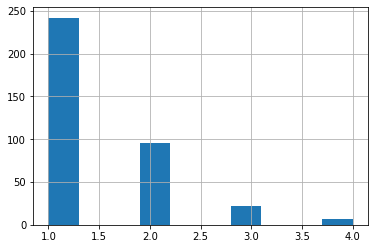

In [44]:
math_power.traveltime.hist()
math_power.traveltime.describe()

In [45]:
math_power.traveltime = math_power.traveltime.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца большинство детей проживаеют в непосредственной близости от школы, выбросы отсуствуют. Отсуствует 28 значений.
### Время на учебу вне школы

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

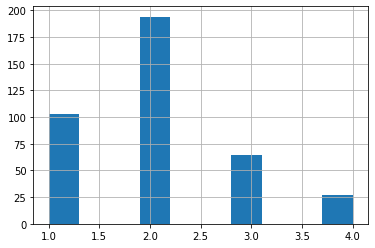

In [46]:
math_power.studytime.hist()
math_power.studytime.describe()

In [47]:
math_power.studytime = math_power.studytime.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца, половина детей занимаются от 2 до 5 часов, выбросы отсуствуют. Отсуствует 7 значений.
### Количество внеучебных неудач

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

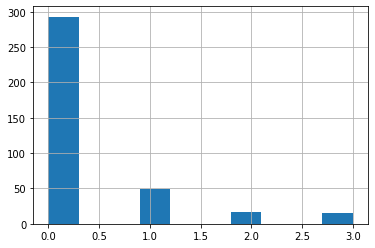

In [48]:
math_power.failures.hist()
math_power.failures.describe()

In [49]:
print(math_power.failures.nunique(),math_power.failures.isna().sum())
pd.DataFrame(math_power.failures.value_counts())

4 22


,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [50]:
math_power.failures = math_power.failures.apply(lambda x: None if pd.isnull(x) else x)

Скажу честно я даже непонял что это за столбец, но столбец распределен нормально, внеучебных неудачников гараздо меньше чем внеучебных удачников. Отсуствующих значений 22.
### Семейные отношения

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

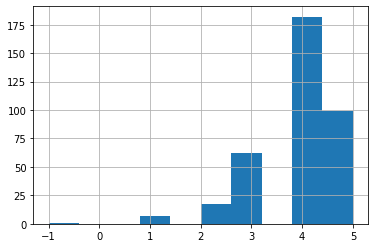

In [51]:
math_power.famrel.hist()
math_power.famrel.describe()

In [52]:
print(math_power.famrel.nunique(),math_power.famrel.isna().sum())
pd.DataFrame(math_power.famrel.value_counts())

6 27


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [53]:
math_power.famrel = math_power.famrel.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца в большей части, в семьях преобладает положительный марально психологический климат, присуствует вброс. Отсуствует 27 значений.
### Свободное время

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

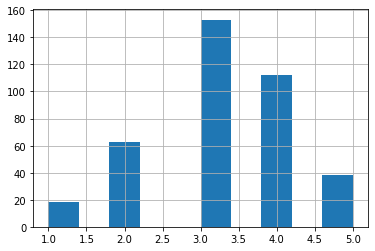

In [54]:
math_power.freetime.hist()
math_power.freetime.describe()

In [55]:
math_power.freetime = math_power.freetime.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца значения распределенны нормально. Отсуствует 11 значений. 
### Время с друзьями

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

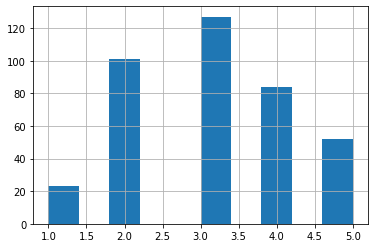

In [56]:
math_power.goout.hist()
math_power.goout.describe()

In [57]:
math_power.goout = math_power.goout.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца значения распределенны нормально. Отсуствует 8 значений.
### Состояние здоровья

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

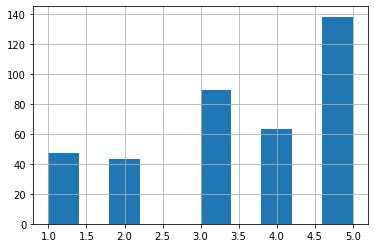

In [58]:
math_power.health.hist()
math_power.health.describe()

In [59]:
math_power.health = math_power.health.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца большая часть учашихся имеет хорошее здоровье, отсуствуют выбросы. Отсуствует 15 значений
### Количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

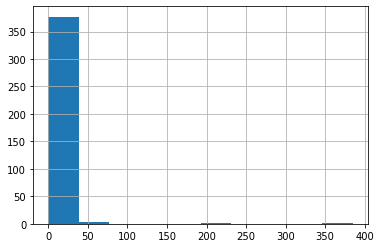

In [60]:
math_power.absences.hist()
math_power.absences.describe()

In [61]:
math_power.absences = math_power.absences.apply(lambda x: None if pd.isnull(x) else x)

По данным столбца присуствуют выбросы. Отсуствуют 12 значений.
### Баллы по гос экзамену

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

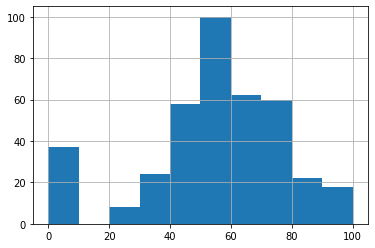

In [62]:
math_power.score.hist()
math_power.score.describe()

In [63]:
math_power.score = math_power.score.apply(lambda x: None if pd.isnull(x) else x)

Таблица распределенна нормально. Отсуствует 6 значений

# Этап №2
## Устранение выбросов

В трех столбцах находятся выбросы:
- Образование отца (по заданным параметрам)
- Семейные отношения (по заданным праметрам)
- Количество пропущенных занятий (логически уберем значения > 50, остальные максимальные значения около 50 возможны у спортсменов)

Для дальнейшего анализа данных необходимо убрать эти данные из таблицы.

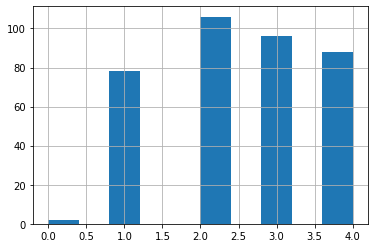

In [64]:
math_power = math_power.loc[(math_power.Fedu < 5)|(math_power.Fedu.isna())]
math_power.Fedu.hist()

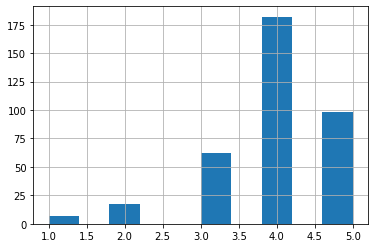

In [65]:
math_power = math_power.loc[(math_power.famrel > 0)|(math_power.famrel.isna())]
math_power.famrel.hist()

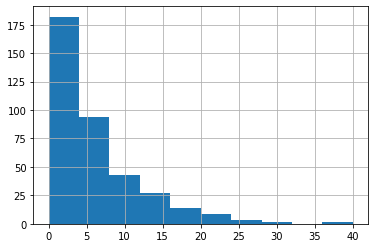

In [66]:
math_power = math_power.loc[(math_power.absences < 50)|(math_power.absences.isna())]
math_power.absences.hist()

In [67]:
math_power

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,yes,None,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Датафрейм учеников сократился на 7 значения благодаря выбросам. 

# Этап №3
## Оценка количества уникальных значений для номинативных переменных.

Т.к. количество уникальных значений в номинативных переменных не больше 5, то в анализ пойдут все значения.
К номинативным переменным отнесем:

In [68]:
nominative = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Этап №4
## Проведение корреляционного анализа количественных переменных

Выясним, какие столбцы коррелируют с итоговыми баллами по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 
Корреляции рассмотрим только для числовых столбцов.

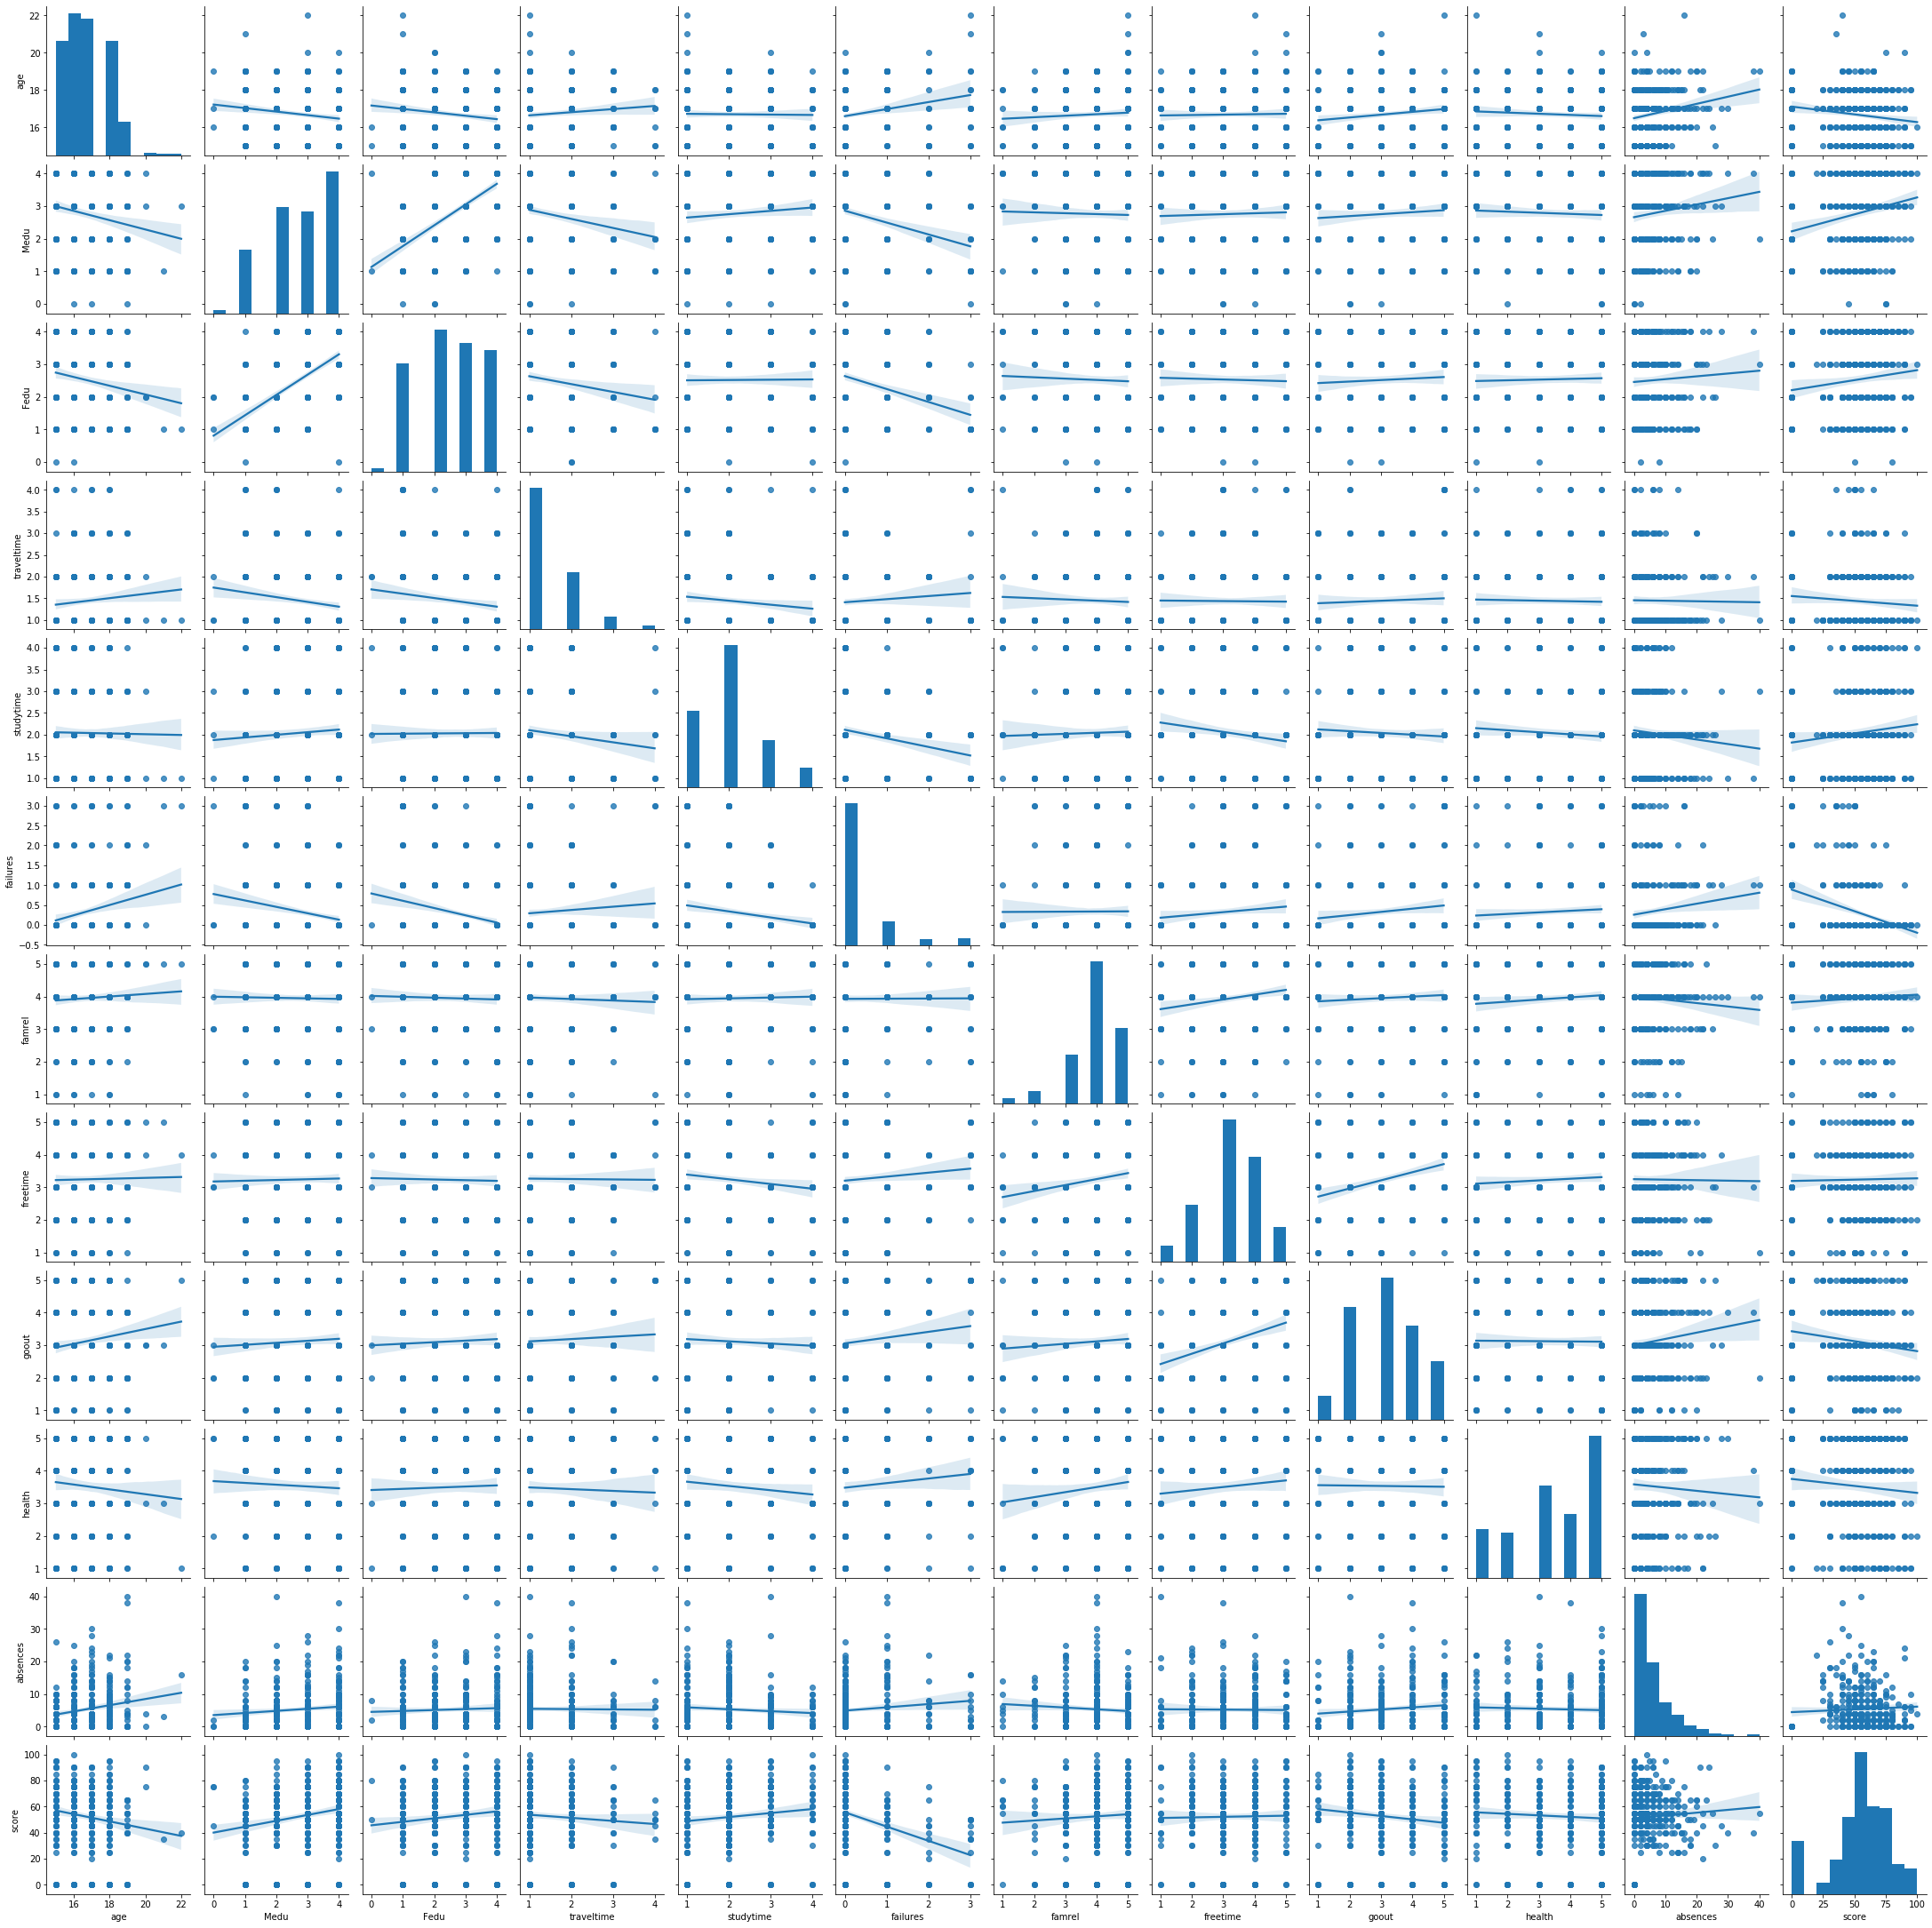

In [69]:
sns.pairplot(math_power, kind = 'reg')

In [70]:
math_power.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164444,-0.156712,0.091718,-0.013277,0.220793,0.056953,0.017290,0.130697,-0.067851,0.191796,-0.152513
Medu,-0.164444,1.000000,0.631160,-0.174954,0.078819,-0.242421,-0.021640,0.025534,0.060707,-0.043214,0.111971,0.216809
Fedu,-0.156712,0.631160,1.000000,-0.154587,0.007066,-0.269520,-0.033370,-0.023466,0.047036,0.027678,0.049870,0.127934
traveltime,0.091718,-0.174954,-0.154587,1.000000,-0.113345,0.076689,-0.036489,-0.008847,0.044977,-0.026197,-0.010384,-0.072795
studytime,-0.013277,0.078819,0.007066,-0.113345,1.000000,-0.173167,0.025600,-0.124766,-0.052719,-0.078604,-0.078704,0.113930
failures,0.220793,-0.242421,-0.269520,0.076689,-0.173167,1.000000,0.004675,0.092961,0.119324,0.074739,0.117607,-0.344656
famrel,0.056953,-0.021640,-0.033370,-0.036489,0.025600,0.004675,1.000000,0.165081,0.059805,0.101054,-0.075355,0.062532
freetime,0.017290,0.025534,-0.023466,-0.008847,-0.124766,0.092961,0.165081,1.000000,0.281323,0.071398,-0.009672,0.018950
goout,0.130697,0.060707,0.047036,0.044977,-0.052719,0.119324,0.059805,0.281323,1.000000,-0.009593,0.110847,-0.126309
health,-0.067851,-0.043214,0.027678,-0.026197,-0.078604,0.074739,0.101054,0.071398,-0.009593,1.000000,-0.046014,-0.070440


Т.к. ни у одной с другой нет корреляции, близкой к единице, останутся все переменные.
По графикам можно сделать следующие выводы:
- У учеников чьи родители имеют более высокое образование, баллы по экзамену выше.
- Ученики которые тратили больше времени на внеучебные занятия баллы выше.
- Дети которые больше времени проводили с друзьями баллы ниже.
- Чем больше у учеников внеучебных неудач тем хуже они писали экзамен.

# Этап №5
## Анализ номинативных переменных.

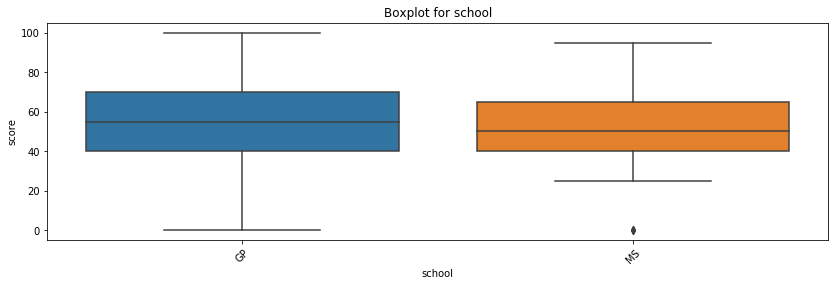

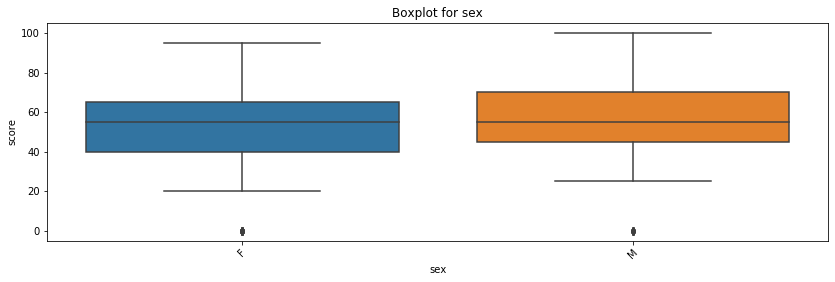

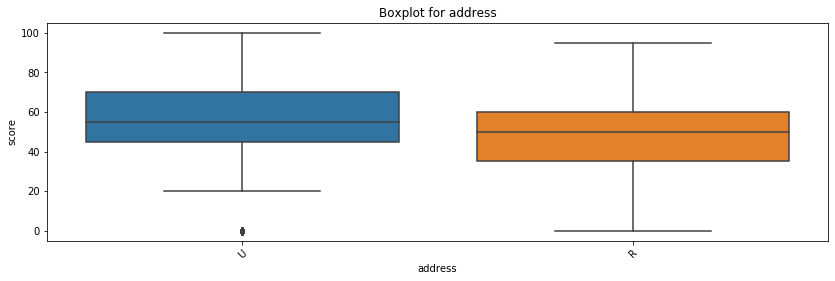

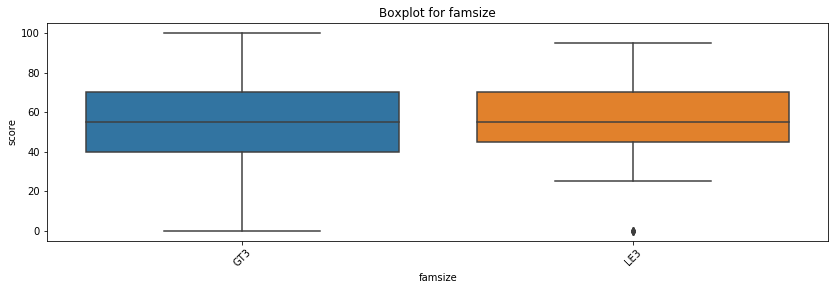

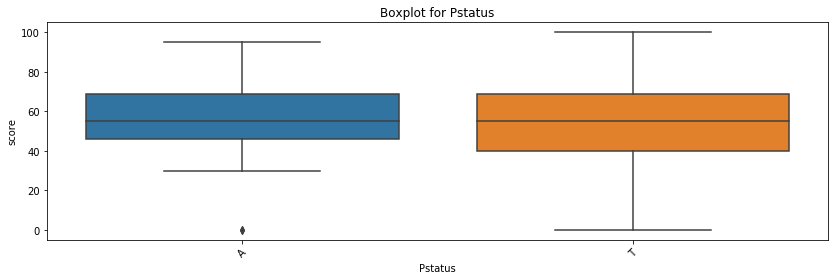

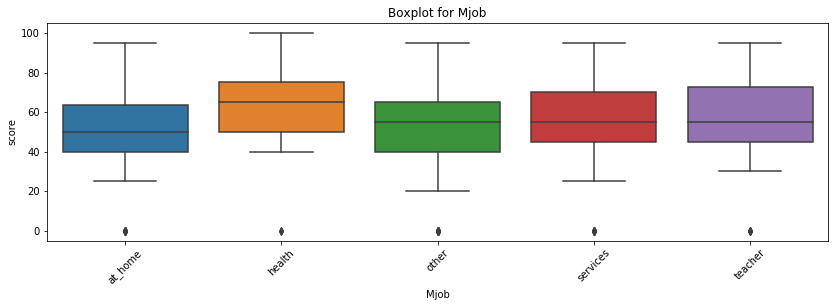

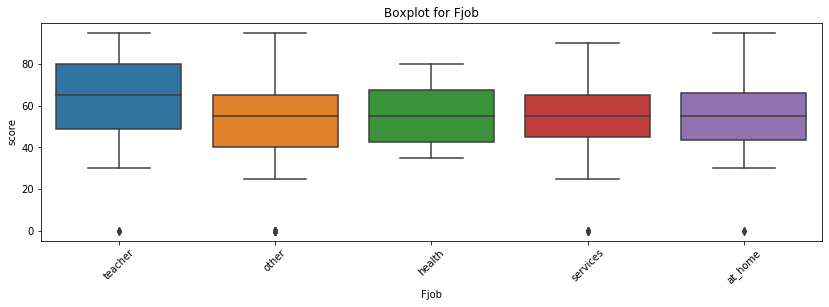

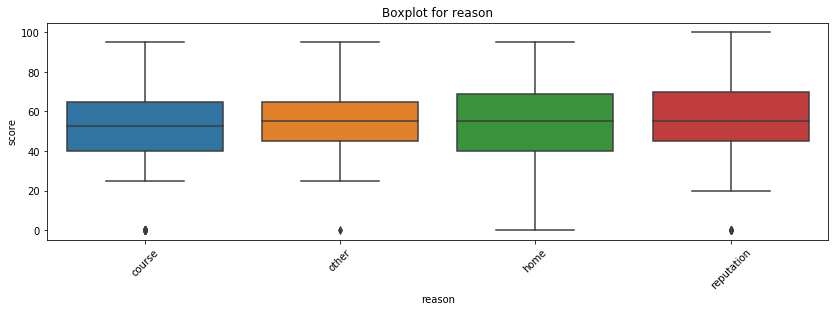

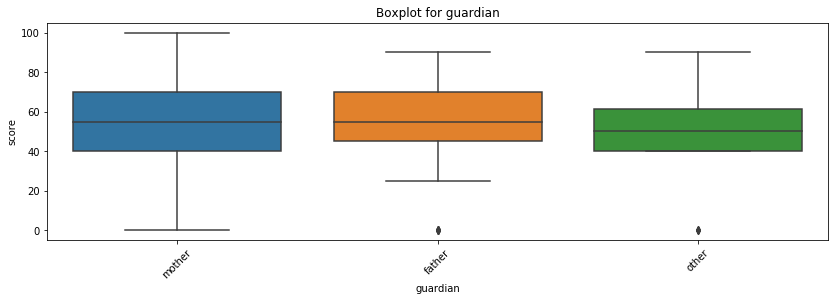

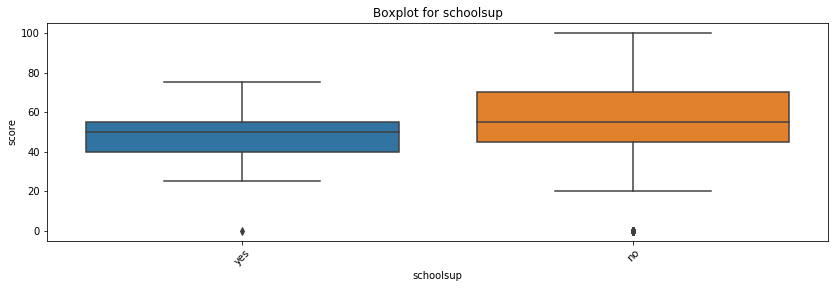

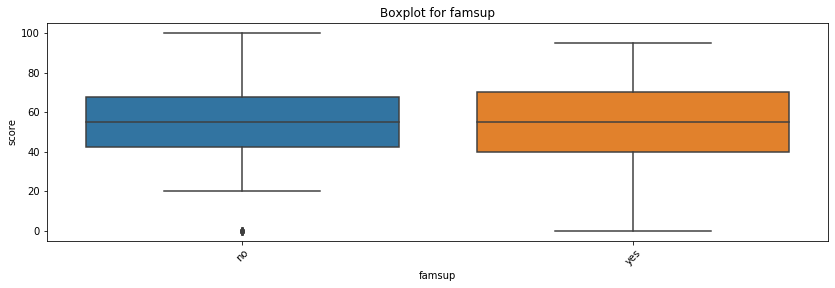

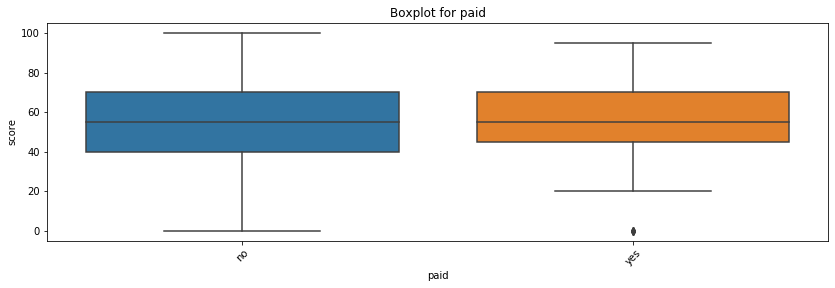

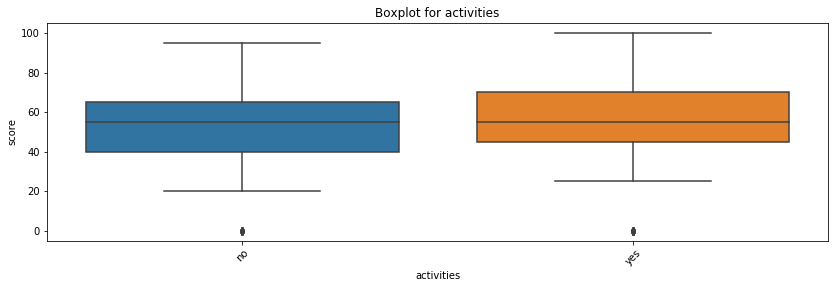

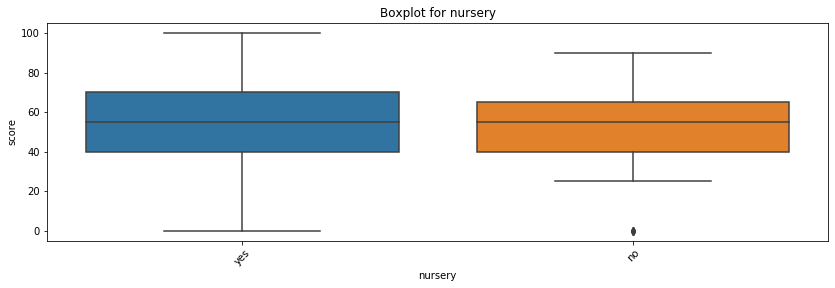

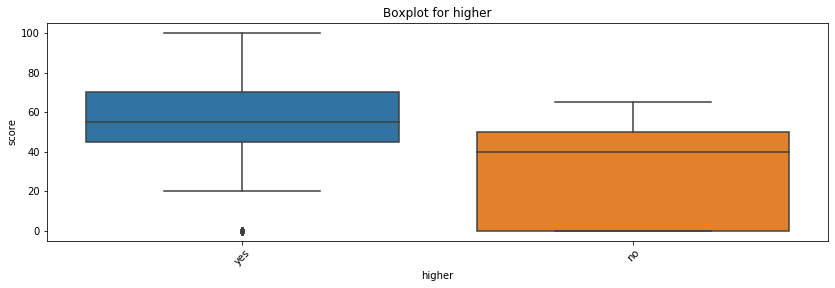

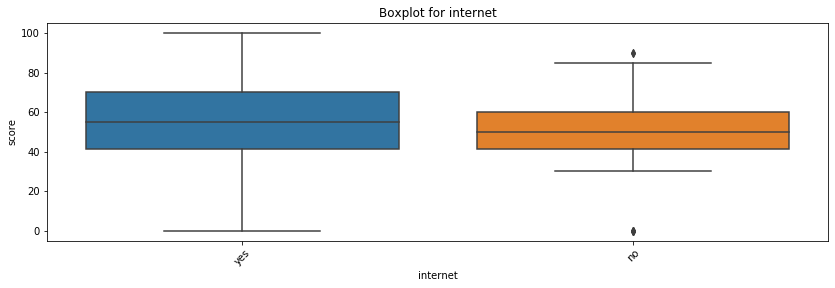

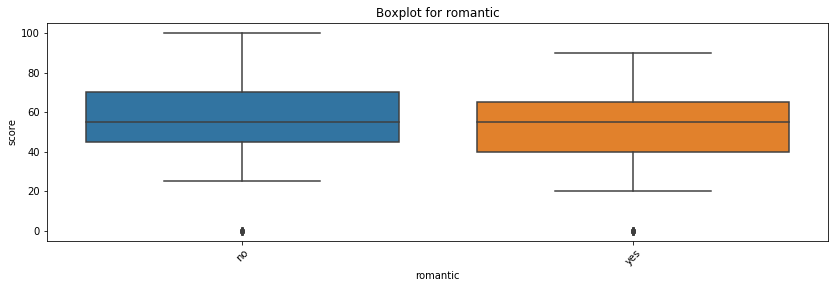

In [73]:
for col in nominative:
    get_boxplot(col)

Графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении баллов по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по различным параметрам неразличимы:

In [114]:
for col in nominative:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


Как мы видим, серьёзно отличается параметр Mjob. Оставим эту переменную в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: все числовые и Mjob.

In [89]:
math_try_power = math_power.loc[:, ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','absences','score','Mjob']]
math_try_power.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,Mjob
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0,at_home
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0,at_home
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0,at_home
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0,health
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0,other


# Этап №6
## Формирование выводов о данных в будущей модели

Итак в результате EDA анализ влияния условий жизни учащихся на успеваемость по математике были полученны следующие выводы:
- В данных достаточно мало пустых значений
- Выбросы найденны в небольшом количестве, что говорит о достаточно чистых данных.
- У учеников чьи родители имеют более высокое образование, баллы по экзамену выше.
- Ученики которые тратили больше времени на внеучебные занятия баллы выше.
- Дети которые больше времени проводили с друзьями баллы ниже.
- Чем больше у учеников внеучебных неудач тем хуже они писали экзамен.
- Важные переменные, которые будут учитываться в дальнейшем для построении модели это: все числовые и Mjob.